In [14]:
#TSN
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import random

In [34]:
dpsh = np.load(r"tsne_dpsh_hashes.npy")
dsh = np.load(r"tsne_dsh_hashes.npy")
dtsh = np.load(r"tsne_dtsh_hashes.npy")
subic = np.load(r"tsne_subic_hashes.npy")
tl = np.load(r"tsne_triplet_hashes.npy")

labels = np.load(r"y_test_Cifar.npy")

In [16]:
dtsh 

array([[1, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 0]])

In [41]:
dsh= (dsh >= 0).astype(int)
dpsh = (dpsh >= 0).astype(int)
#dtsh= (dtsh >= 0).astype(int)


In [35]:
from collections import Counter


def check_collisions_np(hash_codes):
    """
    Check for collisions in a list of NumPy array hash codes.

    Args:
        hash_codes (list or np.ndarray): A list or array of hash codes (NumPy arrays).

    Returns:
        int: Total number of collisions.
        dict: A dictionary with hash codes (as tuples) as keys and their counts as values (for those with collisions).
    """
    # Convert each NumPy array to a tuple (hashable format)
    hash_codes_tuples = [tuple(code) for code in hash_codes]
    
    # Count occurrences of each hash code
    hash_counts = Counter(hash_codes_tuples)
    
    # Filter out hash codes that have collisions (count > 1)
    collisions = {hash_code: count for hash_code, count in hash_counts.items() if count > 1}
    
    # Calculate total number of collisions
    total_collisions = sum(count - 1 for count in collisions.values())
    
    return total_collisions, collisions

In [38]:
len(subic)

10000

In [18]:
np.mean(subic)

0.25

In [19]:
np.mean(dsh)

0.5022166666666666

In [20]:
np.mean(dpsh)

0.49574583333333333

In [21]:
np.mean(dtsh)

0.48816041666666665

In [22]:
dsh

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 0]])

In [23]:
np.mean(dtsh)

0.48816041666666665

In [24]:
c_list = [subic,dsh,dpsh,dtsh,tl]
labels_list = [labels]*5

In [25]:
titles = ["SuBiC","DSH","DPSH","DTSH","TL"]

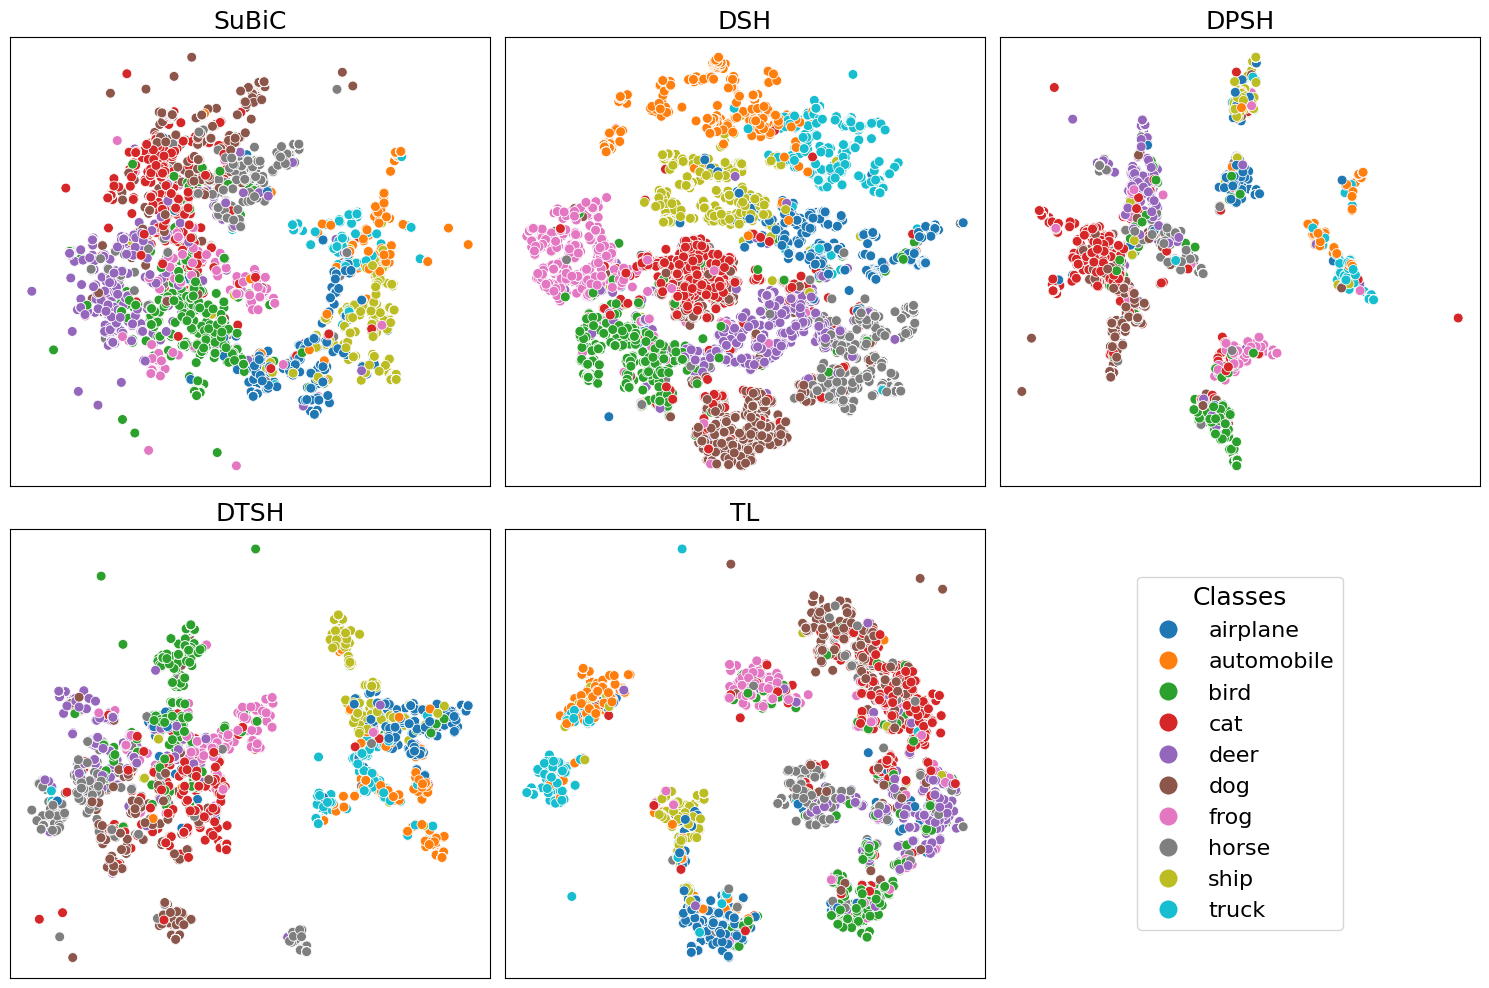

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D

class_names = [ 
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]

# Initialize a t-SNE instance
tsne = TSNE(n_components=2, random_state=42)

# Create a 2x3 grid for the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axes to easily loop through them
axes = axes.flatten()

# Use Seaborn's tab10 color palette (10 distinct colors)
palette = sns.color_palette("tab10", 10)

# Loop through the datasets in hash_codes_list and create t-SNE plots
for i, (hash_codes, labels, title) in enumerate(zip(c_list, labels_list, titles)):
    # Perform t-SNE on the hash codes
    tsne_result = tsne.fit_transform(hash_codes)
    
    # Create a scatter plot using Seaborn
    sns.scatterplot(
        x=tsne_result[:, 0], 
        y=tsne_result[:, 1], 
        hue=labels, 
        palette=palette, 
        ax=axes[i], 
        s=50, 
        legend=False  # We will add the legend in the last plot
    )
    axes[i].set_title(title,fontsize = 18)
    
    # Remove xticks and yticks
    axes[i].set_xticks([])  # Remove x-ticks
    axes[i].set_yticks([])  # Remove y-ticks
    axes[i].set_xlabel('')  # Remove x-axis label
    axes[i].set_ylabel('')  # Remove y-axis label

# Create an empty plot for the legend in the last position (index 5)
axes[5].axis('off')  # Hide the last subplot

# Creating the legend only in the last spot
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], 
           markersize=14, label=class_names[i])  # Increase marker size for better visibility
    for i in range(10)
]
axes[5].legend(
    handles=legend_elements, 
    title="Classes", 
    loc='center', 
    fontsize=16,  # Increase font size for legend text
    title_fontsize=18  # Increase font size for legend title
)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig(r"tsne_nuswide_48_bits.jpg", dpi=200)
plt.show()


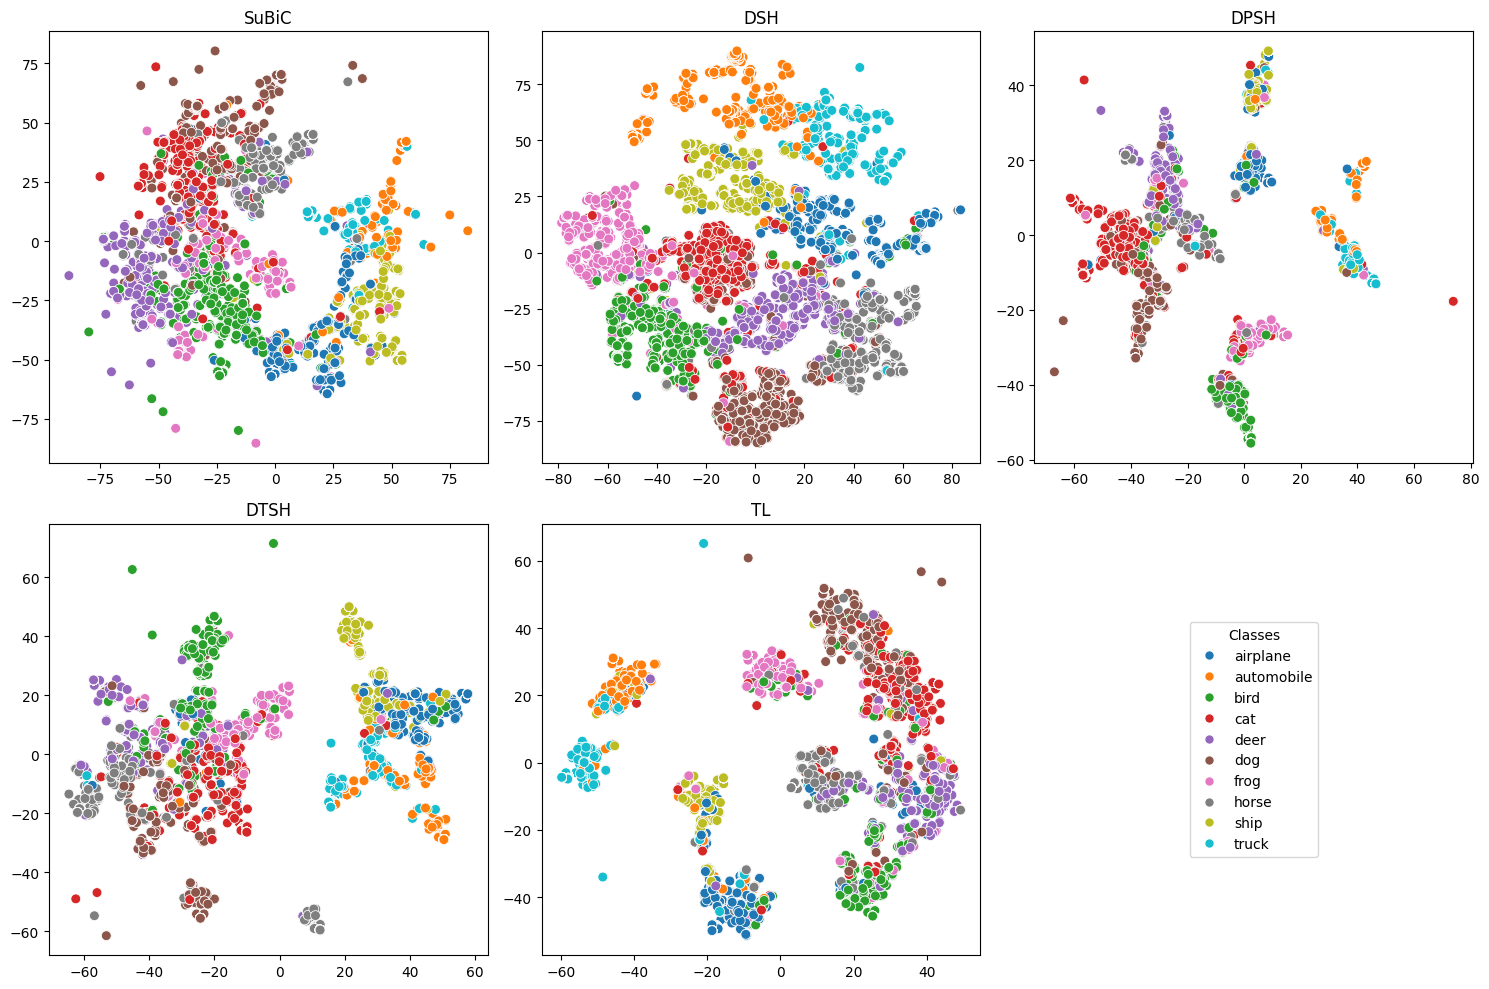

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D

# Example class names for the labels (0-9)
class_names = [ 
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]

# Initialize a t-SNE instance
tsne = TSNE(n_components=2, random_state=42)

# Create a 2x3 grid for the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axes to easily loop through them
axes = axes.flatten()

# Use Seaborn's tab10 color palette (10 distinct colors)
palette = sns.color_palette("tab10", 10)

# Loop through the datasets in hash_codes_list and create t-SNE plots
for i, (hash_codes, labels, title) in enumerate(zip(c_list, labels_list, titles)):
    # Perform t-SNE on the hash codes
    tsne_result = tsne.fit_transform(hash_codes)
    
    # Create a scatter plot using Seaborn
    sns.scatterplot(
        x=tsne_result[:, 0], 
        y=tsne_result[:, 1], 
        hue=labels, 
        palette=palette, 
        ax=axes[i], 
        s=50, 
        legend=False  # We will add the legend in the last plot
    )
    axes[i].set_title(title)

# Create an empty plot for the legend and colorbar in the last position (index 5)
axes[5].axis('off')  # Hide the last subplot

# Creating the legend only in the last spot
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=7, label=class_names[i]) 
                   for i in range(10)]
axes[5].legend(handles=legend_elements, title="Classes", loc='center')

# Add a colorbar in the last position (which is empty, index 5)
# We add a colorbar based on the `scatter` from the last plot in axes[4]
sns.scatterplot(
    x=np.nan, y=np.nan, hue=np.array(range(10)), 
    palette=palette, ax=axes[5], legend=False
)
#fig.colorbar(plt.cm.ScalarMappable(cmap=sns.color_palette("tab10", as_cmap=True)), ax=axes[5], shrink=0.8)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig(r"tsne_nuswide_48_bits.jpg",dpi = 200)
plt.show()



In [14]:

def visualize_tsne(hash_codes, labels, perplexity=30, random_state=42,title_name = "Change This"):

    if len(hash_codes) != len(labels):
        raise ValueError("hash_codes and labels must have the same length.")

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    hash_codes_2d = tsne.fit_transform(hash_codes)

    # Shuffle colors in the palette
    palette = sns.color_palette("tab10")
    #random.shuffle(palette)
    # Define class names
    class_names = [
        "airplane", "automobile", "bird", "cat", "deer", 
        "dog", "frog", "horse", "ship", "truck"
    ]

    # Plot
    plt.figure(figsize=(10, 8))
    plt.title(f"TSNE for {title_name} on CIFAR-10")
    scatter_plot = sns.scatterplot(
        x=hash_codes_2d[:, 0], 
        y=hash_codes_2d[:, 1], 
        hue=[class_names[label] for label in labels], 
        palette=palette, 
        legend="full"
    )
    scatter_plot.legend_.set_title("Label")
    scatter_plot.legend(loc='upper right', bbox_to_anchor=(1, 1)) 
    # Set x and y axis labels
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.savefig(fr"C:\Users\frede\Desktop\TSNE hash codes\{title_name}.jpg",dpi = 200)
    


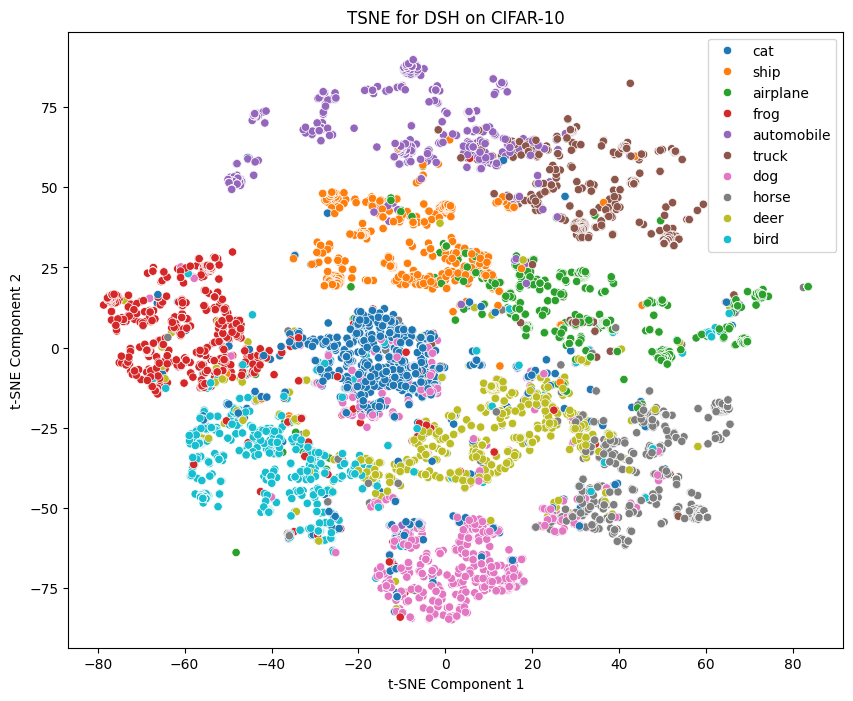

In [39]:
visualize_tsne(dsh, labels, perplexity=30, random_state=42,title_name= "DSH")

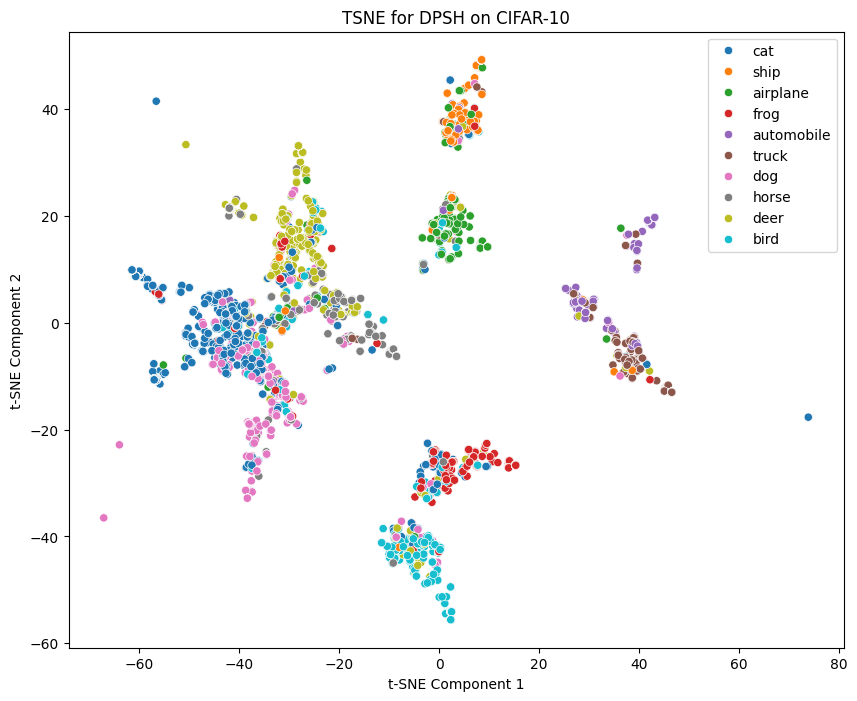

In [40]:
visualize_tsne(dpsh, labels, perplexity=30, random_state=42,title_name= "DPSH")

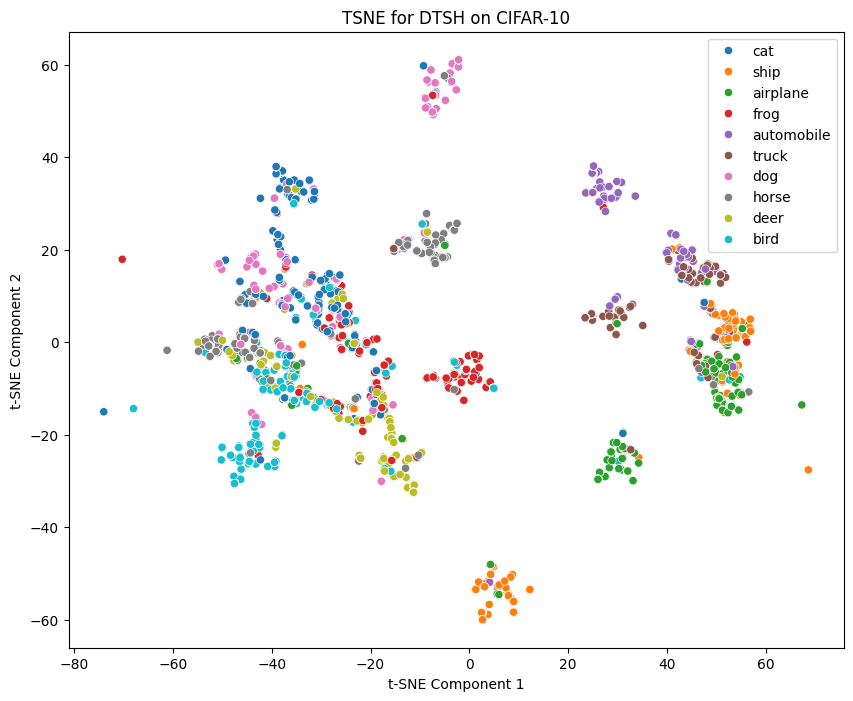

In [41]:
visualize_tsne(dtsh, labels, perplexity=30, random_state=42,title_name= "DTSH")

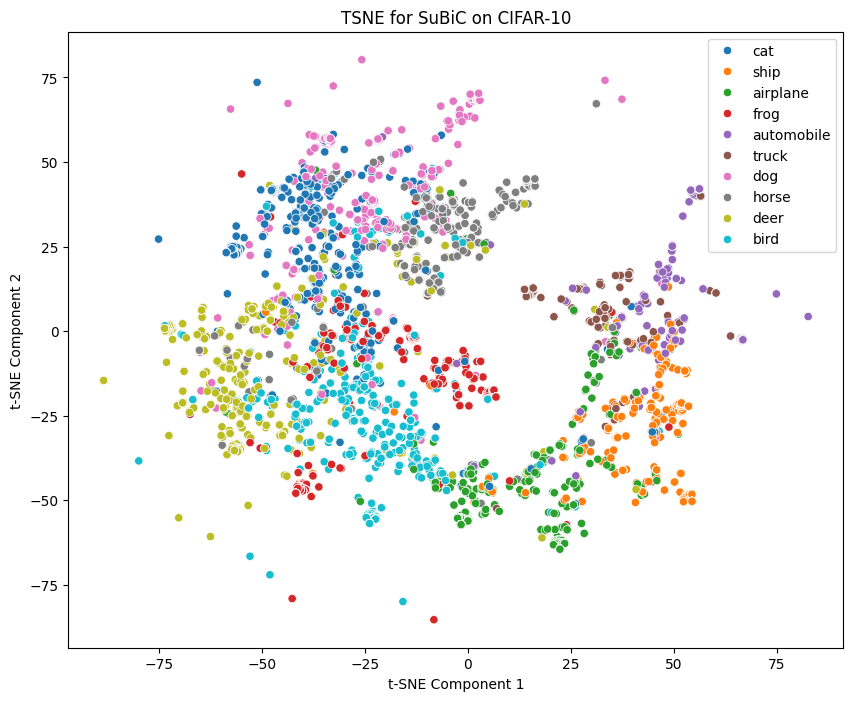

In [42]:
visualize_tsne(subic, labels, perplexity=30, random_state=42,title_name= "SuBiC")